In [44]:
import os
import glob
import ast
import json
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

In [45]:
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"

pos_hits_data = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
pos_consistency_score = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_{mode}_{a}_{b}.csv")
pos_final_df = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hits_summary_genrewise_{mode}_{a}_{b}.csv")      # hits summary genre wise          
pos_consistency_score_genrewise = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_genrewise_{mode}_{a}_{b}.csv") # consistency score genre wise    

vel_hits_data = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
vel_consistency_score = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_{mode}_{a}_{b}.csv")
vel_final_df = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_summary_genrewise_{mode}_{a}_{b}.csv")      # hits summary genre wise          
vel_consistency_score_genrewise = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_genrewise_{mode}_{a}_{b}.csv") # consistency score genre wise  

posvel_hits_data = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
posvel_consistency_score = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_{mode}_{a}_{b}.csv")
posvel_final_df = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_summary_genrewise_{mode}_{a}_{b}.csv")      # hits summary genre wise          
posvel_consistency_score_genrewise = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_genrewise_{mode}_{a}_{b}.csv") # consistency score genre wise  
               

#### Overall Tempo Accuracy

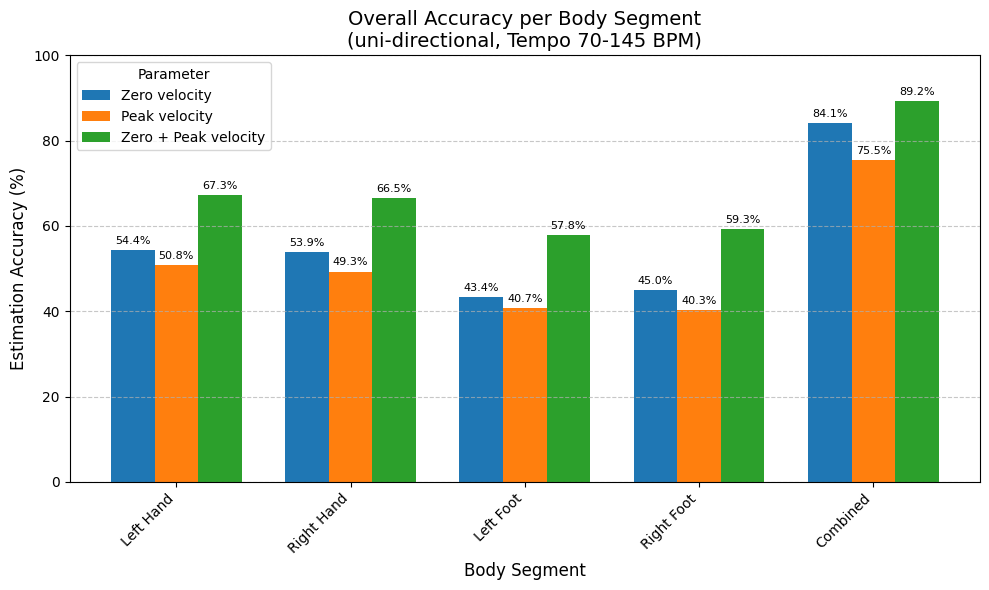

In [46]:
# Grouped bar plot
pos_df = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
vel_df = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
posvel_df = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")

# Plot parameters
x = np.arange(len(pos_df["segment"]))  # Segment indices
width = 0.25  # Width of the bars (adjusted for three groups)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, pos_df["hits_percentage"], width, label='Zero velocity', color='#1f77b4')
bars2 = ax.bar(x, vel_df["hits_percentage"], width, label='Peak velocity', color='#ff7f0e')
bars3 = ax.bar(x + width, posvel_df["hits_percentage"], width, label='Zero + Peak velocity', color='#2ca02c')

# Add text labels on top of each bar
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=8)

# Plot aesthetics
ax.set_ylabel('Estimation Accuracy (%)', fontsize=12)
ax.set_xlabel('Body Segment', fontsize=12)
ax.set_title(f'Overall Accuracy per Body Segment\n({mode}-directional, Tempo {a}-{b} BPM)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pos_df["segment"], rotation=45, ha='right', fontsize=10)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Parameter", fontsize=10, title_fontsize=10)

plt.tight_layout()
plt.show()


#### Inter limb tempo consistency score

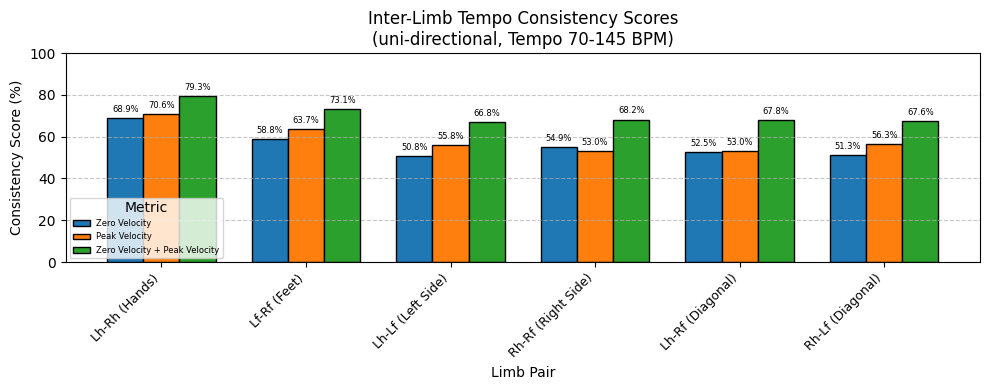

In [47]:

# Combine all three datasets into a single DataFrame
combined_df = pd.DataFrame({
    "Pair": pos_consistency_score["Pair"],
    "Position": pos_consistency_score["Consistency Score"],
    "Velocity": vel_consistency_score["Consistency Score"],
    "PosVel": posvel_consistency_score["Consistency Score"]
})

# Create grouped bar plot
x = np.arange(len(combined_df["Pair"]))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 4))

bars1 = ax.bar(x - width, combined_df["Position"], width, label="Zero Velocity", color="#1f77b4", edgecolor='black')
bars2 = ax.bar(x, combined_df["Velocity"], width, label="Peak Velocity", color="#ff7f0e", edgecolor='black')
bars3 = ax.bar(x + width, combined_df["PosVel"], width, label="Zero Velocity + Peak Velocity", color="#2ca02c", edgecolor='black')

# Formatting the plot
ax.set_xlabel("Limb Pair", fontsize=10)
ax.set_ylabel("Consistency Score (%)", fontsize=10)
ax.set_title(f"Inter-Limb Tempo Consistency Scores\n({mode}-directional, Tempo {a}-{b} BPM)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(combined_df["Pair"], rotation=45, ha="right", fontsize=9)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Metric", fontsize=6, loc= 'lower left')

# Adding percentage labels on top of bars
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=6)

plt.tight_layout()
plt.show()
